# News Categorization Project

**GOAL**: Predict news category (out of 41 categories) based on news' short descriptions using machine and deep learning.

**Concepts/Techniques practiced**: NLP, RNN(Recurrent Neural Network) - LSTM, GRU, Bodirectional, CNN(Convolutional Neural Network), Naive Bayes, Transfer Learning, Wordclouds, EDA

**Conclusion**: After conducting EDA on the data set, I built several models to compare the results and choose the best performing one. The best performing model on unseen data was model_5 (transfer learning) with an accuracy score of 45.95%.

**Future Improvements**: Explore other ways to encode text data and their impact on a model's performance.

In [1]:
import pandas as pd
import os
import seaborn as sns
import regex as re
import matplotlib.pyplot as plt
import tensorflow as tf
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Data Cleaning, Exploratory Data Analaysis (EDA) and Data Visualization

## Data Cleaning
In this section, I am only focusing on the "link", "authors" and "date" columns, since they are the ones I am going to visualize. I will later generate and explore random "headlines" and "short_descriptions" as well, however, these columns will be cleaned and preprocessed separately in text vectorization section right before creating our first model.

In [2]:
news_data = pd.read_json("News_Category_Dataset_v3.json", lines = True)

In [ ]:
news_data.head(6)

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22
5,https://www.huffpost.com/entry/belk-worker-fou...,Cleaner Was Dead In Belk Bathroom For 4 Days B...,U.S. NEWS,The 63-year-old woman was seen working at the ...,,2022-09-22


I want to extract the publisher website from the "link" column and explore what authors are represented the most in this data set.

In [3]:
news_data["authors"] = [re.sub(r'[^\w\s]', '', a) for a in news_data["authors"]]
news_data["authors"] = [''.join(a.split()).lower() for a in news_data["authors"]]
news_data["authors"] = [re.sub(r"^\s*$", "unknown", a) for a in news_data["authors"]]

In [ ]:
news_data["link"] = [l.replace("https://www.", "") for l in news_data["link"]]
news_data["link"] = [re.sub(".com(.*)", "", l) for l in news_data["link"]]
news_data["link"] = [l.replace('.in/entry/kathua-rape-and-murder-case-verdict_in_5cfde91ae4b04e90f1cbb75f','') for l in news_data["link"]]

In [ ]:
news_data.head(5)

,link,headline,category,short_description,authors,date
0,huffpost,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,carlakjohnsonap,2022-09-23
1,huffpost,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,marypapenfuss,2022-09-23
2,huffpost,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",elysewanshel,2022-09-23
3,huffpost,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",carolinebologna,2022-09-23
4,huffpost,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,ninagolgowski,2022-09-22


Now we see the news publisher clearly. I converted the "authors" column to lower case, removed white spaces and punctuation to be able to deal with empty cells and replace them with "unknown". The trade off is that comprehending the authors became a little more difficult now but we do not have the mysterious empty cells anymore!

In [ ]:
news_data["link"].value_counts()

huffingtonpost    200854
huffpost            8673
Name: link, dtype: int64

In [ ]:
news_data.dtypes

link                         object
headline                     object
category                     object
short_description            object
authors                      object
date                 datetime64[ns]
dtype: object

Since the "date" column is already in the right dtype, we can move on to visualizations!

## Data Visualization (EDA)

In [ ]:
most_common_authors = news_data["authors"].value_counts().loc[lambda x: x > 1000]
most_common_authors = pd.DataFrame(most_common_authors).reset_index()
most_common_authors.columns = ['author', 'frequency']

In [ ]:
publisher = pd.DataFrame(news_data["link"].value_counts()).reset_index()
publisher.columns = ['publisher', 'frequency']

### Publisher and author frequency within the dataset

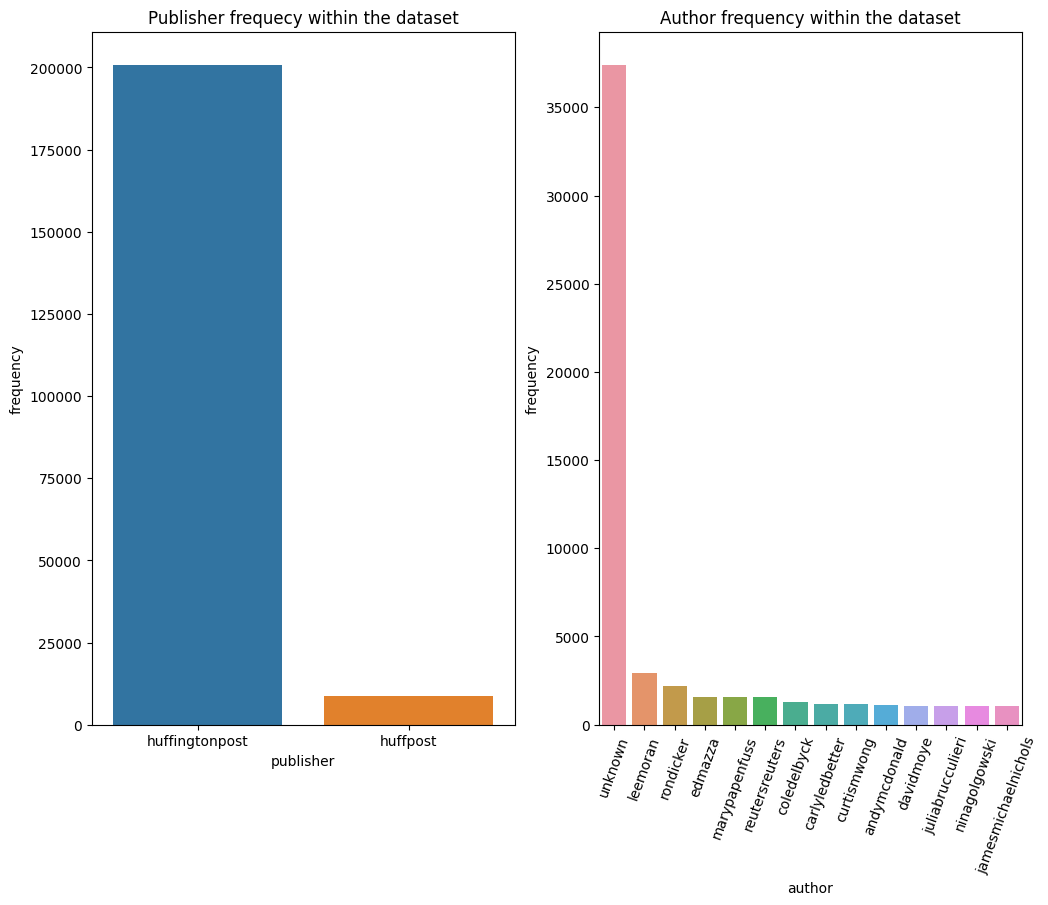

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (12, 9), sharex = False)
sns.barplot(y = publisher['frequency'], x = publisher['publisher'], ax = axes[0]).set(title = "Publisher frequecy within the dataset")
sns.barplot(y = most_common_authors['frequency'], x = most_common_authors['author'], ax = axes[1]).set(title = "Author frequency within the dataset")
plt.xticks(rotation = 70)
plt.show()

Huffingtonpost and huffpost are essentially the same publisher. I think huffingtonpost might've changed their domain to huffpost not so long ago, which is why we see significantly less articles from huffpost.

### Publishing date frequency

In [ ]:
date_df = pd.DataFrame(news_data["date"].value_counts()).reset_index()
date_df.columns = ['date', 'frequency']

In [ ]:
date_df.tail(5)

,date,frequency
3885,2018-08-17,2
3886,2020-01-29,2
3887,2018-08-28,2
3888,2018-08-29,2
3889,2022-01-07,2


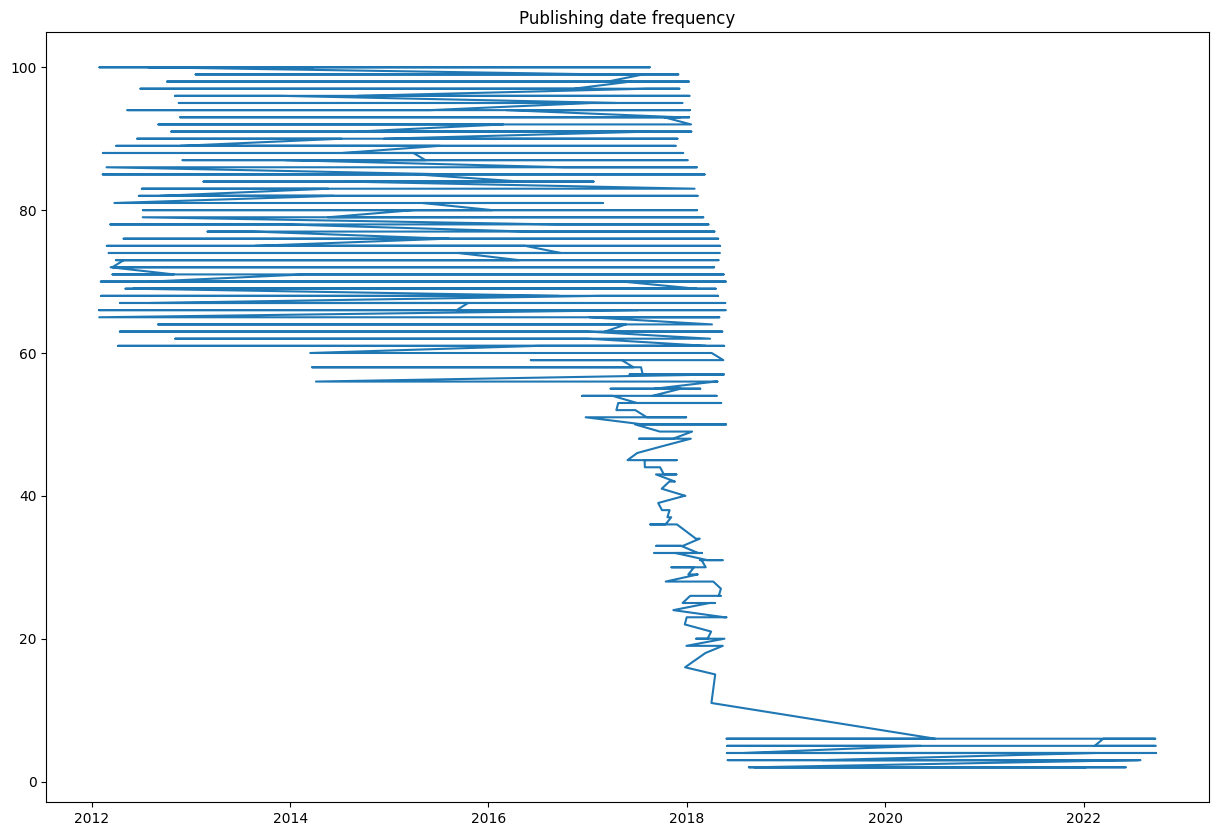

In [ ]:
plt.figure(figsize = (15, 10))
plt.plot(date_df['date'], date_df['frequency'])
plt.title("Publishing date frequency")
plt.show()

### Category representation in the dataset

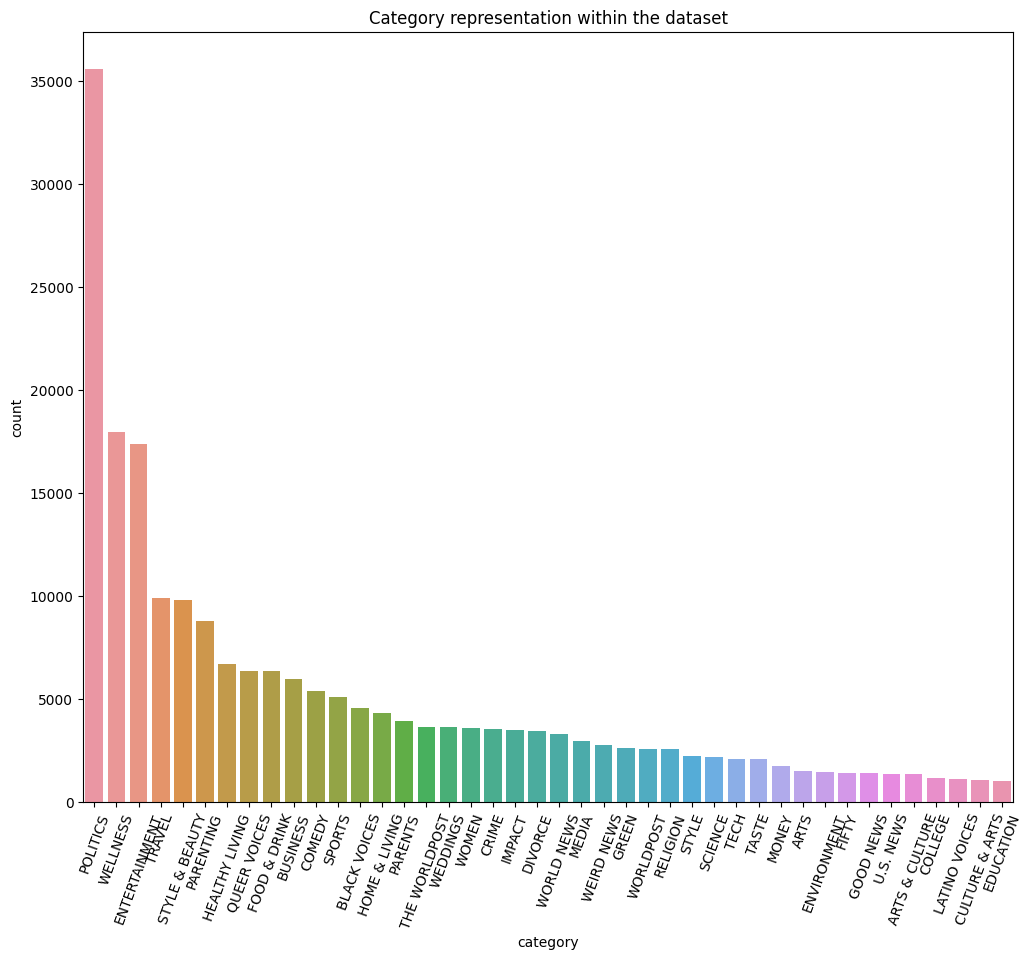

In [ ]:
plt.figure(figsize = (12, 10))
sns.countplot(data = news_data, x = "category", order = news_data['category'].value_counts().index).set(title = "Category representation within the dataset")
plt.xticks(rotation = 70)
plt.show()

### Wordclouds

#### All categories wordcloud

In [ ]:
text = " ".join(d for d in news_data.short_description)
print(f'The total number of words in all short descriptions: {len(text)}')
print(f'The average word length of a description is: {round(len(text)/len(news_data))}')

The total number of words in all short descriptions: 24139326
The average word length of a description is: 115


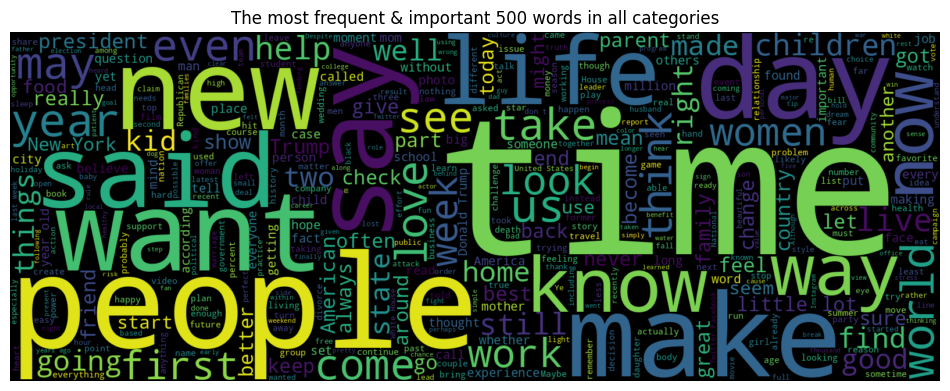

In [ ]:
stopwords = set(STOPWORDS)
stopwords.update(["will", "need", "u", "one", "thing", "many", "much", "s", "something"])
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      height = 600,
                      width = 1600,
                      min_font_size = 10,
                      max_words =500,
                      repeat = False).generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize =(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("The most frequent & important 500 words in all categories")
plt.axis("off")
plt.show()

#### Category-specific wordclouds

We will visualize the 500 most important and frequent words for top-10 categories in the dataset.

In [ ]:
cat = news_data.groupby('category')["short_description"]
pol = news_data[news_data['category'] == 'POLITICS']['short_description']

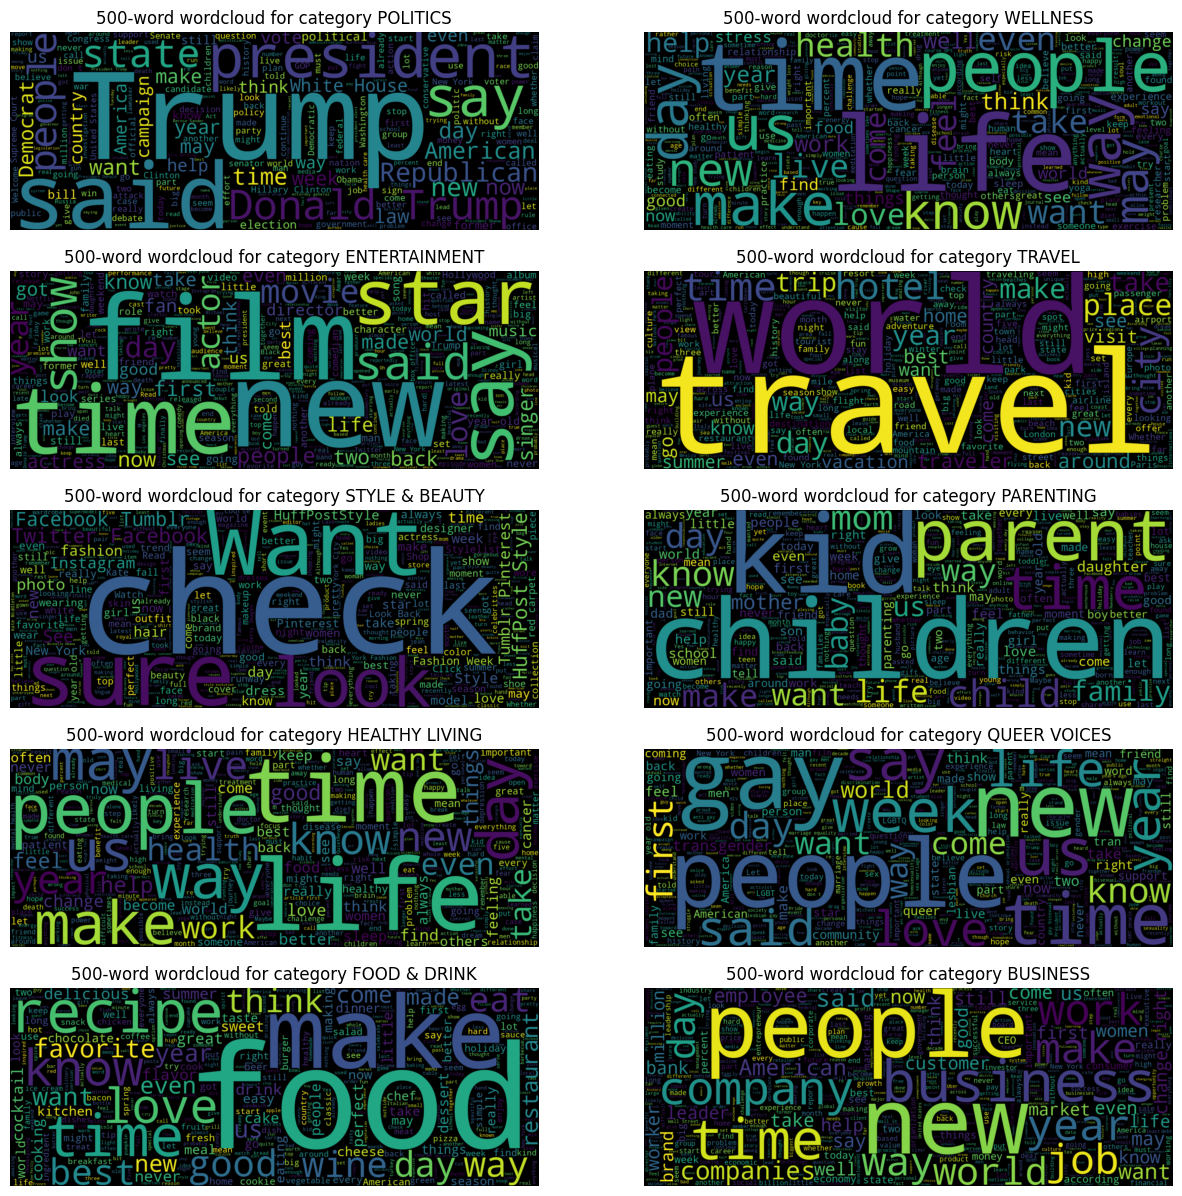

In [ ]:
import numpy as np
common_categories = news_data['category'].value_counts()[:10].reset_index()
common_categories.columns = ['name', 'frequency']

plt.figure(figsize = (15, 15))
for category, i in zip(common_categories.name, np.arange(len(common_categories.name))):
  #print(category, i)
  cat_df = news_data[news_data['category'] == category]['short_description']
  text_each = " ".join(c for c in cat_df)

  wc_category = WordCloud(stopwords=stopwords,
                          background_color="black",
                          height = 600,
                          width = 1600,
                          min_font_size = 10,
                          max_words =500,
                          repeat = False).generate(text_each)
  plt.subplot(5, 2, i+1)
  plt.imshow(wc_category, interpolation='bilinear')
  plt.title(f'500-word wordcloud for category {category}')
  plt.axis('off')

From the wordclouds above, we can see that most categories have distinct vocubularly associated with the specific news category. However, there are words like "people" that are common across several categories like "business" and "queer voices", while words like "travel" are most likely only associated with the category "travel".

# Machine and Deep learning

## Text data pre-processing

In [3]:
from sklearn.model_selection import train_test_split
import nltk.corpus
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [4]:
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [5]:
shuffled_news = news_data.sample(frac = 1, random_state = 42)
shuffled_news.category = shuffled_news.category.map(lambda x: "WORLDPOST" if x == "THE WORLDPOST" else x)

In [6]:
categories = shuffled_news['category'].to_numpy()
encoded_categories = LabelEncoder().fit_transform(categories)
print(f"First 10 categories before encoding:\n {categories[:10]}")
print(f'\n After encoding:\n {encoded_categories[:10]}')

First 10 categories before encoding:
 ['IMPACT' 'BUSINESS' 'POLITICS' 'GREEN' 'SCIENCE' 'PARENTING' 'WELLNESS'
 'SCIENCE' 'STYLE & BEAUTY' 'POLITICS']

 After encoding:
 [18  3 24 15 27 22 37 27 30 24]


In [10]:
unique_categories = np.unique(categories)
unique_categories[27]

'SCIENCE'

In [7]:
train_data0, test_data, train_categories0, test_categories = train_test_split(shuffled_news['short_description'].to_numpy(),
                                                                            encoded_categories,
                                                                            test_size = 0.2,
                                                                            random_state = 42)

In [8]:
train_data, validation_data, train_cat, validation_cat = train_test_split(train_data0,
                                                                          train_categories0,
                                                                          test_size = 0.15,
                                                                          random_state = 42)

In [13]:
len(train_data), len(test_data), len(validation_data)

(142477, 41906, 25144)

In [9]:
def cleaning(text):
  stop = stopwords.words('english')
  text = text.lower()
  text = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", text)
  text = [word for word in text.split() if word not in stop]
  #sentence = []
  # for word in text:
  #   lemmatizer = WordNetLemmatizer()
  #   sentence.append(lemmatizer.lemmatize(word))
  return " ".join(text)

In [14]:
import random
ind = random.choice(range(len(train_data)))
print(f"Before cleaning and pre-processing:\n {train_data[ind]}")
print(f'\nAfter cleaning and pre-processing:\n {cleaning(train_data[ind])}')

Before cleaning and pre-processing:
 As president, the proud groper could shape policies that directly affect survivors.

After cleaning and pre-processing:
 president proud groper could shape policies directly affect survivors


In [10]:
clean_train = [cleaning(description) for description in train_data]
clean_test = [cleaning(description) for description in test_data]
clean_validation = [cleaning(description) for description in validation_data]

In [11]:
import numpy as np
train_data = np.asarray(clean_train)
validation_data = np.asarray(clean_validation)
test_data = np.asarray(clean_test)
clean_train[0], train_cat[0], #clean_validation.shape, validation_cat.shape

('unethical discuss personnel issues outside committee begin revealing decisionmaking process writing inadvertently gave colleague lawyer document later became centerpiece successful lawsuit',
 4)

## Baseline Model: Naive Bayes

In [17]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB # the frequency of words
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier

In [ ]:
baseline = Pipeline([
    ("count", CountVectorizer()),
    ("clf", SGDClassifier())
])

baseline.fit(clean_train, train_cat)

Pipeline(steps=[('count', CountVectorizer()), ('clf', SGDClassifier())])

In [ ]:
baseline_score = baseline.score(clean_test, test_categories)
print(f"Our baseline model has an accuracy score of: {round(baseline_score*100, 2)}%")

Our baseline model has an accuracy score of: 42.84%


## Deep Learning Models

### Text Vectorization and Embedding layers

In [ ]:
print(f'Average word-length: {round(sum([len(i.split()) for i in clean_train])/len(clean_train))}')

Average word-length: 11


In [12]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [13]:
max_vocab = 500000
max_length = 15

text_vectorizer = TextVectorization(max_tokens = max_vocab,
                                    output_mode = 'int',
                                    output_sequence_length = max_length)

In [14]:
text_vectorizer.adapt(train_data)

In [15]:
learned_words = text_vectorizer.get_vocabulary()
print(f'Top 10 most common words: {learned_words[:10]}')
print(f'Least common 10: {learned_words[-10:]}')

Top 10 most common words: ['', '[UNK]', 'one', 'new', 'us', 'people', 'time', 'like', 'said', 'get']
Least common 10: ['008', '0054', '0015', '0011', '0010', '001', '000foot', '0002', '0000', '00']


In [16]:
embedding = layers.Embedding(input_dim = max_vocab,
                             output_dim = 128,
                             input_length = max_length,
                             name = "embedding_layer")

### Recurrent Neural Networks (RNNs)

#### LSTM (Long Short Term Memory)

In [ ]:
inputs = layers.Input(shape = (1,), dtype = tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.LSTM(64, return_sequences = True)(x)
x = layers.LSTM(64, return_sequences = True)(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dense(64, activation = "relu")(x)
x = layers.Dropout(0.6)(x)
outputs = layers.Dense(41, activation = "softmax")(x)
model_1 = tf.keras.Model(inputs, outputs, name = "Model_1_LSTM")

In [ ]:
model_1.summary()

Model: "Model_1_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 12)               0         
 ectorization)                                                   
                                                                 
 embedding_layer (Embedding)  (None, 12, 128)          12800000  
                                                                 
 lstm (LSTM)                 (None, 12, 64)            49408     
                                                                 
 lstm_1 (LSTM)               (None, 12, 64)            33024     
                                                                 
 global_average_pooling1d (G  (None, 64)               0         
 lobalAveragePooling1D)                               

In [18]:
es = tf.keras.callbacks.EarlyStopping(monitor = "val_accuracy",
                                      patience = 3,
                                      verbose = 1)

In [ ]:
model_1.compile(loss = "sparse_categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

model_1_history = model_1.fit(x = train_data,
                              y = train_cat,
                              epochs = 10,
                              validation_data = (validation_data, validation_cat),
                              callbacks = [es])

Epoch 1/10
4453/4453 [==============================] - 108s 22ms/step - loss: 2.7944 - accuracy: 0.2910 - val_loss: 2.4398 - val_accuracy: 0.3642
Epoch 2/10
4453/4453 [==============================] - 66s 15ms/step - loss: 2.3371 - accuracy: 0.3942 - val_loss: 2.3113 - val_accuracy: 0.4024
Epoch 3/10
4453/4453 [==============================] - 64s 14ms/step - loss: 2.0609 - accuracy: 0.4569 - val_loss: 2.3194 - val_accuracy: 0.4082
Epoch 4/10
4453/4453 [==============================] - 58s 13ms/step - loss: 1.8312 - accuracy: 0.5069 - val_loss: 2.4685 - val_accuracy: 0.4060
Epoch 5/10
4453/4453 [==============================] - 59s 13ms/step - loss: 1.6294 - accuracy: 0.5560 - val_loss: 2.6748 - val_accuracy: 0.4028
Epoch 6/10
4453/4453 [==============================] - 59s 13ms/step - loss: 1.4706 - accuracy: 0.5973 - val_loss: 2.9643 - val_accuracy: 0.3964
Epoch 6: early stopping


In [ ]:
from sklearn.metrics import accuracy_score
model_1_pred_probs = model_1.predict(test_data)
model_1_pred = tf.squeeze(model_1_pred_probs.argmax(axis = 1))

model_1_accuracy = accuracy_score(test_categories, model_1_pred)
print(f'Model accuracy is: {round(model_1_accuracy*100, 2)}%')

1310/1310 [==============================] - 8s 5ms/step
Model accuracy is: 39.17%


Model_1 achieved accuracy ~ 60 % on the train data and ~40 % on validation, test = 39.17%. Let's experiment with other RNN layers such as GRU and Bidirectional layers.

#### Model_2: Adding Bidirectionality

In [ ]:
inputs = layers.Input(shape = (1,), dtype = tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Bidirectional(layers.LSTM(64, return_sequences = True))(x)
x = layers.Bidirectional(layers.LSTM(64, return_sequences = True))(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dense(64, activation = "relu")(x)
x = layers.Dropout(0.6)(x)
outputs = layers.Dense(41, activation = "softmax")(x)
model_2 = tf.keras.Model(inputs, outputs, name = "Model_2_LSTM_bidirectional")

In [ ]:
model_2.summary()

Model: "Model_2_LSTM_bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 12)               0         
 ectorization)                                                   
                                                                 
 embedding_layer (Embedding)  (None, 12, 128)          12800000  
                                                                 
 bidirectional (Bidirectiona  (None, 12, 128)          98816     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 12, 128)          98816     
 nal)                                                            
                                        

In [ ]:
model_2.compile(loss = "sparse_categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

model_2_history = model_2.fit(x = train_data,
                              y = train_cat,
                              epochs = 10,
                              validation_data = (validation_data, validation_cat),
                              callbacks = [es])

Epoch 1/10
4453/4453 [==============================] - 116s 24ms/step - loss: 1.8566 - accuracy: 0.5144 - val_loss: 2.7417 - val_accuracy: 0.3933
Epoch 2/10
4453/4453 [==============================] - 83s 19ms/step - loss: 1.4448 - accuracy: 0.6167 - val_loss: 3.0157 - val_accuracy: 0.3810
Epoch 3/10
4453/4453 [==============================] - 80s 18ms/step - loss: 1.2765 - accuracy: 0.6579 - val_loss: 3.4075 - val_accuracy: 0.3778
Epoch 4/10
4453/4453 [==============================] - 77s 17ms/step - loss: 1.1607 - accuracy: 0.6873 - val_loss: 3.7510 - val_accuracy: 0.3756
Epoch 4: early stopping


In [ ]:
model_2_pred_probs = model_2.predict(test_data)
model_2_pred = tf.squeeze(model_2_pred_probs.argmax(axis = 1))

model_2_accuracy = accuracy_score(test_categories, model_2_pred)
print(f'Model accuracy is: {round(model_2_accuracy*100, 2)}%')

1310/1310 [==============================] - 14s 7ms/step
Model accuracy is: 37.29%


HA! The accuracy score dropped even lower, while training accuracy increased, which is unsurprising given we made our model more complex and, hence, more likely to overfit. My hope was that with an increase in training accuray, we might see an increase in testing...

#### Model_3: GRU (Gated Recurrent Unit)

In [ ]:
inputs = layers.Input(shape = (1,), dtype = tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GRU(64, return_sequences = True)(x)
x = layers.GRU(64, return_sequences = True)(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(64, activation = "relu")(x)
x = layers.Dropout(0.6)(x)
outputs = layers.Dense(41, activation = "softmax")(x)
model_3 = tf.keras.Model(inputs, outputs, name = "Model_2_LSTM_bidirectional")

In [ ]:
model_3.compile(loss = "sparse_categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

model_3_history = model_3.fit(x = train_data,
                              y = train_cat,
                              validation_data = (validation_data, validation_cat),
                              epochs = 10,
                              callbacks = [es])

Epoch 1/10
4453/4453 [==============================] - 92s 20ms/step - loss: 1.8694 - accuracy: 0.5073 - val_loss: 2.8122 - val_accuracy: 0.3773
Epoch 2/10
4453/4453 [==============================] - 64s 14ms/step - loss: 1.4206 - accuracy: 0.6174 - val_loss: 3.2234 - val_accuracy: 0.3731
Epoch 3/10
4453/4453 [==============================] - 60s 14ms/step - loss: 1.2745 - accuracy: 0.6541 - val_loss: 3.5953 - val_accuracy: 0.3614
Epoch 4/10
4453/4453 [==============================] - 60s 14ms/step - loss: 1.1843 - accuracy: 0.6767 - val_loss: 4.0689 - val_accuracy: 0.3689
Epoch 4: early stopping


In [ ]:
model_3_pred_probs = model_3.predict(test_data)
model_3_pred = tf.squeeze(model_3_pred_probs.argmax(axis = 1))

model_3_accuracy = accuracy_score(test_categories, model_3_pred)
print(f'Model accuracy is: {round(model_3_accuracy*100, 2)}%')

1310/1310 [==============================] - 6s 4ms/step
Model accuracy is: 36.76%


Ah, the accuracy is now even worse. Let's try making our best performing deep learning model less complex.

#### Model_4: Making model 1 less complex

In [ ]:
inputs = layers.Input(shape = (1,), dtype = tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.LSTM(64)(x)
x = layers.Dense(64, activation = "relu")(x)
x = layers.Dropout(0.4)(x)
outputs = layers.Dense(41, activation = "softmax")(x)
model_4 = tf.keras.Model(inputs, outputs, name = "Model_1_LSTM")

In [ ]:
model_4.compile(loss = "sparse_categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

model_4_history = model_4.fit(x = train_data,
                              y = train_cat,
                              validation_data = (validation_data, validation_cat),
                              epochs = 10,
                              callbacks = [es])

Epoch 1/10
4453/4453 [==============================] - 78s 16ms/step - loss: 1.5133 - accuracy: 0.5963 - val_loss: 3.0901 - val_accuracy: 0.3788
Epoch 2/10
4453/4453 [==============================] - 49s 11ms/step - loss: 1.0874 - accuracy: 0.7027 - val_loss: 3.6025 - val_accuracy: 0.3651
Epoch 3/10
4453/4453 [==============================] - 53s 12ms/step - loss: 0.9611 - accuracy: 0.7340 - val_loss: 4.2262 - val_accuracy: 0.3565
Epoch 4/10
4453/4453 [==============================] - 50s 11ms/step - loss: 0.8770 - accuracy: 0.7549 - val_loss: 4.4992 - val_accuracy: 0.3542
Epoch 4: early stopping


In [ ]:
model_4_pred_probs = model_4.predict(test_data)
model_4_pred = tf.squeeze(model_4_pred_probs.argmax(axis = 1))

model_4_accuracy = accuracy_score(test_categories, model_4_pred)
print(f'Model accuracy is: {round(model_4_accuracy*100, 2)}%')

1310/1310 [==============================] - 6s 4ms/step
Model accuracy is: 35.09%


The performance is even worse!

#### Model_comb: Combining all the models

In [17]:
inputs = layers.Input(shape = (1,), dtype = tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.LSTM(64, dropout = 0.1, recurrent_dropout= 0.1, return_sequences = True)(x)
x = layers.LSTM(64, dropout = 0.2, recurrent_dropout = 0.2, return_sequences = True)(x)
x = layers.SimpleRNN(64, dropout = 0.2, recurrent_dropout= 0.2, return_sequences = True)(x)
x = layers.Conv1D(75, 3, activation = 'relu')(x)
x = layers.MaxPool1D()(x)
x = layers.SimpleRNN(64, dropout = 0.2, recurrent_dropout = 0.2, return_sequences = True)(x)
x = layers.GRU(64, dropout = 0.2)(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(41, activation = "softmax")(x)
model_comb = tf.keras.Model(inputs, outputs)
model_comb.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding_layer (Embedding)  (None, 15, 128)          64000000  
                                                                 
 lstm (LSTM)                 (None, 15, 64)            49408     
                                                                 
 lstm_1 (LSTM)               (None, 15, 64)            33024     
                                                                 
 simple_rnn (SimpleRNN)      (None, 15, 64)            8256      
                                                             

In [19]:
model_comb.compile(loss = "sparse_categorical_crossentropy",
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

history_model_comb = model_comb.fit(x = train_data,
                            y = train_cat,
                            validation_data = (validation_data, validation_cat),
                            epochs = 10,
                            callbacks = [es])

Epoch 1/10
4453/4453 [==============================] - 1073s 236ms/step - loss: 2.6785 - accuracy: 0.3179 - val_loss: 2.3687 - val_accuracy: 0.3825
Epoch 2/10
4453/4453 [==============================] - 1006s 226ms/step - loss: 2.2179 - accuracy: 0.4205 - val_loss: 2.2654 - val_accuracy: 0.4142
Epoch 3/10
4453/4453 [==============================] - 1014s 228ms/step - loss: 1.9636 - accuracy: 0.4767 - val_loss: 2.2901 - val_accuracy: 0.4145
Epoch 4/10
4453/4453 [==============================] - 997s 224ms/step - loss: 1.7551 - accuracy: 0.5256 - val_loss: 2.3594 - val_accuracy: 0.4123
Epoch 5/10
4453/4453 [==============================] - 1010s 227ms/step - loss: 1.5876 - accuracy: 0.5692 - val_loss: 2.4584 - val_accuracy: 0.4057
Epoch 6/10
4453/4453 [==============================] - 996s 224ms/step - loss: 1.4563 - accuracy: 0.6047 - val_loss: 2.5800 - val_accuracy: 0.3962
Epoch 6: early stopping


In [20]:
from sklearn.metrics import accuracy_score
model_comb_pred_probs = model_comb.predict(test_data)
model_comb_pred = tf.squeeze(model_comb_pred_probs.argmax(axis = 1))

model_comb_accuracy = accuracy_score(test_categories, model_comb_pred)
print(f'Model accuracy is: {round(model_comb_accuracy*100, 2)}%')

1310/1310 [==============================] - 25s 17ms/step
Model accuracy is: 38.9%


#### Model 5: Transfer Learning

In [ ]:
import tensorflow_hub as hub

In [ ]:
encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                               input_shape = [], # bc it takes in "variable length"
                               dtype = tf.string,
                               trainable = False,
                               name = "USE")

In [ ]:
model_5 = tf.keras.Sequential([
    encoder_layer,
    layers.Dense(512, activation = "relu"),
    layers.Dense(256, activation = "relu"),
    layers.Dense(128, activation = "relu"),
    layers.Dense(41, activation = "softmax")
], name = "Model_5")

In [ ]:
model_5.summary()

Model: "Model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_34 (Dense)            (None, 512)               262656    
                                                                 
 dense_35 (Dense)            (None, 256)               131328    
                                                                 
 dense_36 (Dense)            (None, 128)               32896     
                                                                 
 dense_37 (Dense)            (None, 41)                5289      
                                                                 
Total params: 257,229,993
Trainable params: 432,169
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
model_5.compile(loss = "sparse_categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

model_5_history = model_5.fit(x = train_data,
                              y = train_cat,
                              validation_data = (validation_data, validation_cat),
                              epochs = 10,
                              callbacks = [es])

Epoch 1/10
4453/4453 [==============================] - 79s 17ms/step - loss: 2.1032 - accuracy: 0.4363 - val_loss: 1.9755 - val_accuracy: 0.4639
Epoch 2/10
4453/4453 [==============================] - 78s 18ms/step - loss: 1.9149 - accuracy: 0.4724 - val_loss: 1.9391 - val_accuracy: 0.4728
Epoch 3/10
4453/4453 [==============================] - 74s 17ms/step - loss: 1.8183 - accuracy: 0.4935 - val_loss: 1.9565 - val_accuracy: 0.4638
Epoch 4/10
4453/4453 [==============================] - 71s 16ms/step - loss: 1.7189 - accuracy: 0.5126 - val_loss: 1.9822 - val_accuracy: 0.4680
Epoch 5/10
4453/4453 [==============================] - 71s 16ms/step - loss: 1.6170 - accuracy: 0.5346 - val_loss: 2.0384 - val_accuracy: 0.4618
Epoch 5: early stopping


In [ ]:
model_5_pred_probs = model_5.predict(test_data)
model_5_pred = tf.squeeze(model_5_pred_probs.argmax(axis = 1))

model_5_accuracy = accuracy_score(test_categories, model_5_pred)
print(f'Model accuracy is: {round(model_5_accuracy*100, 2)}%')

1310/1310 [==============================] - 17s 13ms/step
Model accuracy is: 45.92%


This is our best model so far! It has 45.92% accuracy on unseen data, which is better than guessing (since we have 40 categories) but defenitely needs improvement!